In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten


# Data preprocesing

In [ ]:
# It's faster to upload .zip file and then unzip it
!unzip -q ../content/dataset.zip -d ../

[../content/dataset.zip]
  End-of-central-directory signature not found.  Either this file is not
  a zipfile, or it constitutes one disk of a multi-part archive.  In the
  latter case the central directory and zipfile comment will be found on
  the last disk(s) of this archive.
unzip:  cannot find zipfile directory in one of ../content/dataset.zip or
        ../content/dataset.zip.zip, and cannot find ../content/dataset.zip.ZIP, period.


In [ ]:
X_train = np.loadtxt('/content/dataset/input.csv', delimiter=',')
Y_train = np.loadtxt('/content/dataset/labels.csv', delimiter=',')

X_test = np.loadtxt('/content/dataset/input_test.csv', delimiter=',')
Y_test = np.loadtxt('/content/dataset/labels_test.csv', delimiter=',')

In [ ]:
"""
2000 and 400 represents the total number of images in training set and testing set
30000 because every single image is of the size 100 x 100 pixel and 3 RGB channels
"""

print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of Y_train: {Y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of Y_test: {Y_test.shape}')

Shape of X_train: (2000, 30000)
Shape of Y_train: (2000,)
Shape of X_test: (400, 30000)
Shape of Y_test: (400,)


In [ ]:
X_train = X_train.reshape(len(X_train), 100, 100, 3)
Y_train = Y_train.reshape(len(Y_train), 1)

X_test = X_test.reshape(len(X_test), 100, 100, 3)
Y_test = Y_test.reshape(len(Y_test), 1)

# X_train[1,:]
# we have to rescale values in X_train from 0 to 255 (RGB values) to values between 0 to 1

X_train = X_train/255.0
X_test = X_test/255.0


In [ ]:
print(f'Shape of X_train: {X_train.shape}')
print(f'Shape of Y_train: {Y_train.shape}')
print(f'Shape of X_test: {X_test.shape}')
print(f'Shape of Y_test: {Y_test.shape}')

Shape of X_train: (2000, 100, 100, 3)
Shape of Y_train: (2000, 1)
Shape of X_test: (400, 100, 100, 3)
Shape of Y_test: (400, 1)


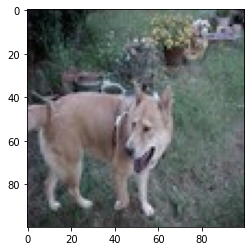

In [ ]:
idx = random.randint(0, len(X_train))
plt.imshow(X_train[idx, :])
plt.show()

# MODEL


In [ ]:
"""
PART 1
32 number of filters (each 3x3 size)
activation function is relu
model expects 100 x 100 x 3 size images

PART 2
64 neurons, activation function is "relu"
1 neuron with sigmoid function
"""
model = Sequential([
    #Part 1
    Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32, (3,3), activation = 'relu'),
    MaxPooling2D((2,2)),
    
    #Part 2
    Flatten(),
    Dense(64, activation = 'relu'),
    Dense(1, activation = 'sigmoid')
])

In [ ]:
model = Sequential()

# adding layers to sequential model
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = (100,100,3)))
model.add(MaxPooling2D((2,2)))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D((2,2)))

model.add(Flatten())
model.add(Dense(64, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
# due to implementing binary classification I used binary_crossentropy as the loss

# opt = keras.optimizers.SGD(learning_rate = 0.001) as an alternative to 'adam'
model.compile(loss = 'binary_crossentropy' , optimizer ='adam', metrics = ['accuracy'])

In [ ]:
# train model for 15 epochs in 64 photos packages

model.fit(X_train, Y_train, epochs = 15, batch_size = 64)

Epoch 1/15
32/32 [==============================] - 22s 655ms/step - loss: 0.7438 - accuracy: 0.5215
Epoch 2/15
32/32 [==============================] - 20s 623ms/step - loss: 0.6920 - accuracy: 0.5150
Epoch 3/15
32/32 [==============================] - 20s 615ms/step - loss: 0.6758 - accuracy: 0.6010
Epoch 4/15
32/32 [==============================] - 20s 610ms/step - loss: 0.6488 - accuracy: 0.6255
Epoch 5/15
32/32 [==============================] - 20s 626ms/step - loss: 0.6062 - accuracy: 0.6790
Epoch 6/15
32/32 [==============================] - 20s 617ms/step - loss: 0.5556 - accuracy: 0.7195
Epoch 7/15
32/32 [==============================] - 21s 658ms/step - loss: 0.5194 - accuracy: 0.7335
Epoch 8/15
32/32 [==============================] - 20s 619ms/step - loss: 0.4715 - accuracy: 0.7830
Epoch 9/15
32/32 [==============================] - 20s 622ms/step - loss: 0.4345 - accuracy: 0.8010
Epoch 10/15
32/32 [==============================] - 20s 618ms/step - loss: 0.4019 - accura

In [ ]:
# accuracy test 
model.evaluate(X_test, Y_test)

13/13 [==============================] - 1s 86ms/step - loss: 0.6923 - accuracy: 0.6925


[0.6922727823257446, 0.6924999952316284]

# Making predictions

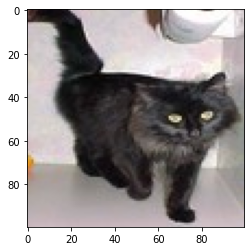

[[0.07389012]]
adam_distr: 0.07389012
accuracy: 85.22198 %
object: dog


In [ ]:
def get_result(y_pred):
  print('adam_distr: ' + str(y_pred[0,0]))

  if y_pred > 0.5:
    accuracy = (y_pred-0.5)/0.5 * 100
  else:
    accuracy = (0.5 - y_pred)/0.5 * 100

  print('accuracy: '+ str(accuracy[0,0]) + ' %')
  y_pred =  y_pred > 0.5

  if(y_pred == 0):
    pred = 'dog'
  else:
    pred = 'cat'

  print('object: ' + pred)

idx2 = random.randint(0, len(Y_test))
plt.imshow(X_test[idx2, :])
plt.show()

# reshape due to input_shape
y_pred = model.predict(X_test[idx2, :].reshape(1, 100, 100, 3))
print(y_pred)
get_result(y_pred)

In [ ]:
model.save("dog_cat_model.h5", include_optimizer=True)